# Ab-Initio: Análisis y Visualización

Trabajar con imágenes satelitales implica incorporar conceptos tales como rasters, resolución, bandas, proyecciones,etc. Para su visualización o representación existen diferentes formas que pueden brindar una mejor interpretación de las mismas (cuando queremos resaltar algo en particular por ejemplo). Adicionalmente al trabajo con rasters le sumamos ciertas representaciones geométricas, lineas, puntos polígonos (también asociados a cierta clase de referencia geométrica) que nos permiten marcar sobre un raster ciertas zonas de interés por ejemplo

![raster-vector-2](../data/media/Raster_vector_tikz.png)

_[fuente](http://tysmagazine.com/los-sig-raster-herramienta-de-analisis-medioambiental-y-territorial/)_


## Raster

En forma simplificada un raster es una grilla de puntos (pensemos en una matriz) cada uno de los cuales tiene alguna clase de identificación geográfica, que nos permite ubicarlos en el espacio. El valor del punto se corresponde con lo medido por el instrumento en cuestión. Respecto a ubicarlos en el "espacio" estamos implicando alguna clase de representacion geografica de la magnitud que medimos.

![coordenadas-raster](../data/media/raster-coordinate.gif)

[fuente](https://desktop.arcgis.com/es/arcmap/10.3/manage-data/geodatabases/raster-basics.htm)

Por ejemplo en la imágen anterior, se resalta una de las diferencias usuales entre la representacion "imagen" y la representacion "raster" (imagen + coordenadas). 

Cada una de esas grillas de puntos se corresponde a una "banda" (si hablamos de imágenes satelitales). Se hace referencia a _banda_ porque esta asociada a un rango (espectral) en el cual el elemento sensor es capaz de "ver" o "capturar" datos.

Notemos que al decir grilla de puntos estamos implicando una representación discreta de lo que estamos queriendo medir, es decir tenemos un cierto nivel de resolución de la zona de interés. En los satelites pueden ir desde los centimetros a los cientos de metros. 

## Vectores

Por vectores nos referimos a un formato de almacenamiento digital donde se guarda la localización de los elementos geográficos y los atributos asociados a ellos. En este sentido no tienen la limitacion (si la podemos considerar de esa forma) de granularidad o resolución. Es decir no tenemos una resolución mínima. 
En un archivo vectorial, los elementos geográficos se representan a partir de tres estructuras básicas: puntos, líneas y polígono, mientras que en los archivos ráster se caracterizan por la existencia de una red formada por celdas o cuadrículas, más comúnmente conocidas como píxel, en la que cada cuadrícula o píxel presenta una cualidad o propiedad espacial (color, altitud, etc) [[fuente]](https://geoinnova.org/blog-territorio/modelo-vectorial-y-modelo-raster/).
 
 ![raster-vector](../data/media/1-raster-vs-vectorial.png )

_[fuente](https://mygisnotebook.blog/2019/03/03/raster-vs-vectorial/)_



## Como se complementan?

Ambos formatos o tipos de almacenamiento son complementarios. Particularmente la informacion que "captura" un satelite es en formato "raster". Para delimitar zonas (para algun analisis posterior por ejemplo) en cambio es mas facil definir un poligono (en un archivo vectorial) y posteriormente efectuar el match entre el vector y la región que abarcaria en el raster.

En la siguiente imagen se ilustra este concepto, donde dependiendo del nivel de granularidad del raster vamos a tener mas o menos "error" en el match y consecuentemente en la propiedad que busquemos calcular.
 
  ![vector-to-raster](../data/media/vector-to-raster.png)

_[fuente](https://ecoscript.org/vectorvsraster/)_


## Sentinel 2 (Plataforma Satelital)

The Copernicus Sentinel-2 mission comprises a constellation of two polar-orbiting satellites placed in the same sun-synchronous orbit, phased at 180° to each other. It aims at monitoring variability in land surface conditions, and its wide swath width (290 km) and high revisit time (10 days at the equator with one satellite, and 5 days with 2 satellites under cloud-free conditions which results in 2-3 days at mid-latitudes) will support monitoring of Earth's surface changes.

For mission planning and updated coverage status information, see the Revisit and Coverage page.

This Sentinel-2 Mission Guide provides a high-level description of the mission objectives, satellite description and ground segment. It also addresses the related heritage missions, thematic areas and Copernicus services, orbit characteristics and coverage, instrument payload, and data products.[REF](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/)

### Sentinel2 Bands

| Band | Central Wavelenght [nm] | Resolution [m] |
|---|---|---|
|1  - Coastal aerosol|  443  |  60 |
|2  - Blue|  490  |  10 |
|3  - Green|  560  |  10 |
|4  - Red|  665  |  10 |
|5  - Vegetation Red Edge|  705  |  20 |
|6  - Vegetation Red Edge|  740  |  20 |
|7  - Vegetation Red Edge|  783  |  20 |
|8  - NIR|  842  |  10 |
|8a - Vegetation Red Edge|  865  |  20 |
|9  - Water vapour|  945  |  60 |
|10 - SWIR Cirrus|  1380 |  60 |
|11 - SWIR|  1610 |  20 |
|12 - SWIR |  2190 |  20 |

### Revisit and Coverage

The Sentinel-2 mission will provide systematic coverage over the following areas:

- all continental land surfaces (including inland waters) between latitudes 56° South and 82.8° North
- all coastal waters up to 20 km from the shore
- all islands greater than 100 km2
- all EU islands
- the Mediterranean Sea
- all closed seas (e.g. Caspian Sea).

In addition, the Sentinel-2 observation scenario includes observations following member states or Copernicus Services requests (e.g. Antarctica, Baffin Bay). 

It is expected up to one revisit every five days.

Sentinel 2 coverage is managed by tiles.



#### Tiles en Córdoba

Por ejemplo para Córdoba el conjunto de tiles de Sentinel2 que la cubren:

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Helpers
def convert_3D_2D(geometry):
    """
    Takes a GeoSeries of 3D Multi/Polygons (has_z) and returns a list of 2D Multi/Polygons
    https://gist.github.com/rmania/8c88377a5c902dfbc134795a7af538d8
    """
    new_geo = []
    for p in geometry:
        if p.has_z:
            if p.geom_type == "Polygon":
                lines = [xy[:2] for xy in list(p.exterior.coords)]
                new_p = Polygon(lines)
                new_geo.append(new_p)
            elif p.geom_type == "MultiPolygon":
                new_multi_p = []
                for ap in p:
                    lines = [xy[:2] for xy in list(ap.exterior.coords)]
                    new_p = Polygon(lines)
                    new_multi_p.append(new_p)
                new_geo.append(MultiPolygon(new_multi_p))
    return new_geo


def gpd_intersect_export(
    input_vector_base,
    input_vector_,
    gpd_overlay={"how": "intersection"},
    flatten_2D=False,
    intersection_file=None,
    intersection_file_layer=None,
    driver_="ESRI Shapefile",
):
    """
    :param input_vector_base: vector shape to intersect
    :param input_vector_: vector shape to compare to
    :param gpd_overlay: overlay options
    :param flatten_2D: bool, if True flatten Polygon Z to Polygon
    :param intersection file: intersection file to be written
    :param intersection file layer: intersection file layer to be written
    :param driver_: driver to use in shape export
    """
    if type(input_vector_base) == gpd.geodataframe.GeoDataFrame:
        gpd_base = input_vector_base
    else:
        gpd_base = gpd.read_file(input_vector_base)

    if type(input_vector_) == gpd.geodataframe.GeoDataFrame:
        gpd_to_int = input_vector_
    else:
        gpd_to_int = gpd.read_file(input_vector_)

    gpd_intersection = gpd.overlay(gpd_base, gpd_to_int, **gpd_overlay)
    if flatten_2D:
        gpd_intersection.geometry = convert_3D_2D(gpd_intersection.geometry)
    if intersection_file is not None:
        gpd_intersection.to_file(
            intersection_file, layer=intersection_file_layer, driver=driver_
        )
    return gpd_intersection

def plot_sentinel2_tiles(gdf_sentinel, figsize_=(12, 12), ax=None):
    """
    :param
    """
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=figsize_)
        gdf_sentinel.plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
    else:
        gdf_sentinel.plot(
            ax=ax, facecolor="none", edgecolor="k", lw=3, figsize=figsize_
        )
    for index, r in gdf_sentinel.iterrows():
        geom_x, geom_y = r["geometry"].centroid.x, r["geometry"].centroid.y
        name = "{}".format(r.Name)
        ax.text(geom_x, geom_y, name,fontsize=10)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    return ax


def plot_tiles_matched_sentinel2(
    gdf_match, gdf_tiles, col_="fuente1", figsize_=(12, 12), ax=None
):
    """
    :param gdf_match: result from gpd_intersect_export function
    :param gdf_sentinel: geo-dataframe from satelite tiles
    :param col_: column from gdf_match to extract names for text in plot
    """

    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=figsize_)
        gdf_match.plot(ax=ax, facecolor="none", edgecolor="b", lw=3)
    else:
        ax = gdf_match.plot(
            facecolor="none", edgecolor="k", lw=3, figsize=figsize_
        )

    gdf_tiles_unique = gdf_match.drop_duplicates("Name")

    for index, r in gdf_tiles_unique.iterrows():
        tile_ = r.Name
        ax = plot_sentinel2_tiles(
            gdf_tiles[(gdf_tiles.Name == tile_)],
            ax=ax,
        )

    for index, r in gdf_match.iterrows():
        if col_ is not None:
            x, y = r["geometry"].centroid.x, r["geometry"].centroid.y
            ax.text(x, y, r[col_], fontsize=8, rotation=60)
        else:
            pass
    return ax

In [3]:
sentinel=gpd.read_file('../data/sentinel/sentinel2_tiles_world.zip!sentinel2_tiles_world.shp')
gpd_prov=gpd.read_file('../data/cba-border.gpkg')
gpd_prov.rename(columns={'Name':'Ciudad'},inplace=True)
gpd_box = gpd.read_file("../data/cba/cordoba.geojson")
#
gdf_match=gpd_intersect_export(sentinel,gpd_prov)

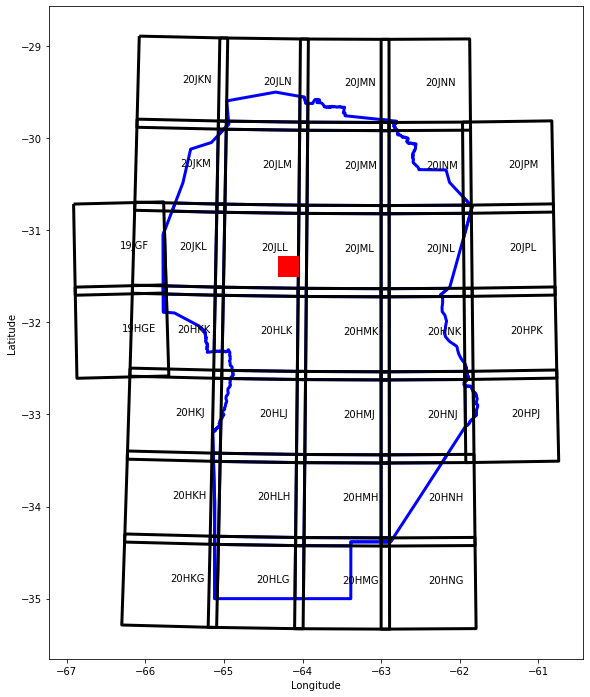

In [4]:
# plot
ax=plot_tiles_matched_sentinel2(gdf_match,sentinel,col_=None)
_=gpd_box.plot(ax=ax,facecolor='r')
plt.savefig('../data/media/cba-tiles-roi.jpg',dpi=128,bbox_inches='tight')

- En azul los limites de Córdoba
- En rojo la ciudad de Córdoba (y zona que vamos a monitorear)
- En negro las cuadriculas junto a su identificacion o codigo (20JLL por ejemplo)

### Ejemplos de Representacion

In [5]:
import rasterio as rio
from earthpy import plot

In [6]:
raster_path='../data/cba/parches-tif/S2A_MSIL1C_20200227T141731_N0209_R010_T20JLL_20200227T175603_cba.TIF'
raster=rio.open(raster_path)
BANDS = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B08", "B11", "B12"]

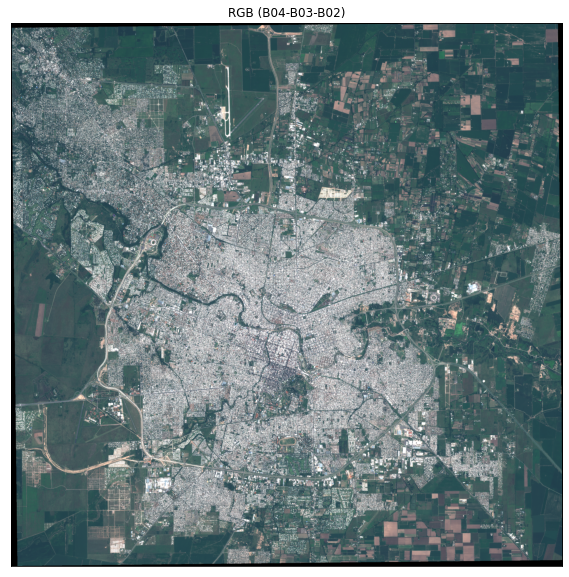

In [7]:
f,ax=plt.subplots(1,1,figsize=(10,10))
plot.plot_rgb(raster.read(),rgb=(2,1,0),stretch=True,ax=ax)
ax.set_title(f"RGB ({BANDS[2]}-{BANDS[1]}-{BANDS[0]})")
plt.savefig('../data/media/raster-rgb-cba.jpg',dpi=128,bbox_inches='tight')

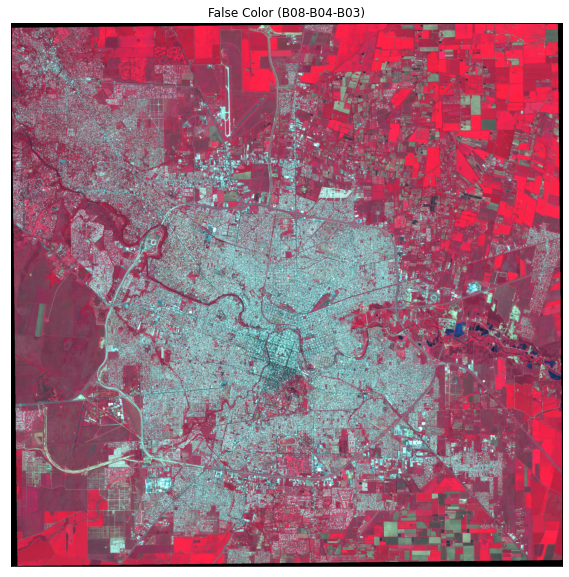

In [8]:
f,ax=plt.subplots(1,1,figsize=(10,10))
plot.plot_rgb(raster.read(),rgb=(7,2,1),stretch=True,ax=ax)
ax.set_title(f"False Color ({BANDS[7]}-{BANDS[2]}-{BANDS[1]})")
plt.savefig('../data/media/raster-false843-cba.jpg',dpi=128,bbox_inches='tight')

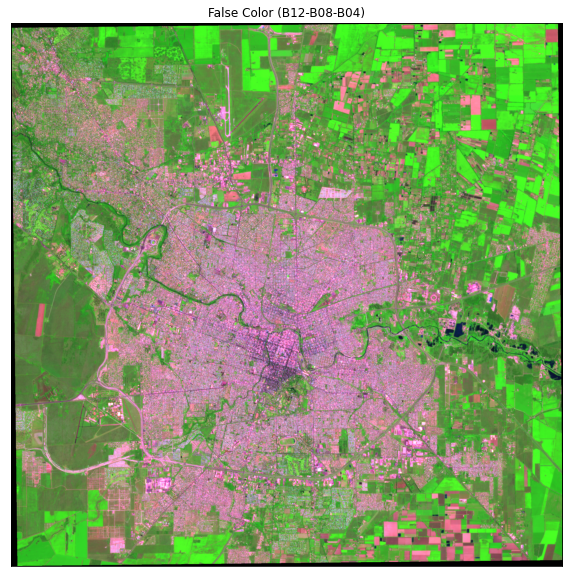

In [9]:
f,ax=plt.subplots(1,1,figsize=(10,10))
plot.plot_rgb(raster.read(),rgb=(9,7,2),stretch=True,ax=ax)
ax.set_title(f"False Color ({BANDS[9]}-{BANDS[7]}-{BANDS[2]})")
plt.savefig('../data/media/raster-false1284-cba.jpg',dpi=128,bbox_inches='tight')

In [10]:
import numpy as np

def get_ndi(
    band_1,
    band_2,
    weight=[1.0, 1.0],
    dtype=rio.float32,
    bands_nodata=0,
    nodata=-1.,
):
    """
    :param
    """

    band_1 = np.where(band_1 == bands_nodata, np.nan, band_1)
    band_2 = np.where(band_2 == bands_nodata, np.nan, band_2)
    ndi_num = weight[0] * band_1.astype(dtype) - weight[1] * band_2.astype(dtype)
    ndi_den = band_1.astype(dtype) * weight[0] + band_2.astype(dtype) * weight[1]
    np.seterr(divide="ignore", invalid="ignore")
    ndi = ndi_num / ndi_den
    np.nan_to_num(ndi, copy=False, nan=nodata)

    return ndi

In [11]:
ndvi=get_ndi(raster.read(7),raster.read(2))

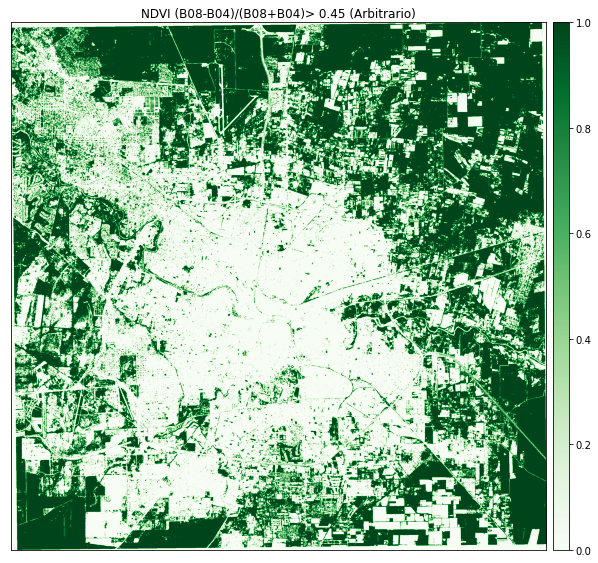

In [12]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ndvi=get_ndi(raster.read(7),raster.read(2))
plot.plot_bands(ndvi>0.45,cmap='Greens',ax=ax)
ax.set_title(f"NDVI ({BANDS[7]}-{BANDS[2]})/({BANDS[7]}+{BANDS[2]})> 0.45 (Arbitrario)")
plt.savefig('../data/media/raster-ndvi-cba.jpg',dpi=128,bbox_inches='tight')